In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
num_classes = 8
train_data_dir = 'train'
validation_data_dir = 'validation'
img_height, img_width = 224, 224  # Reduced image size
batch_size = 2  # Reduced batch size
epochs = 20

# Build a custom CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocess the input data
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Found 2193 images belonging to 8 classes.
Found 621 images belonging to 8 classes.
Epoch 1/20
1097/1097 [==============================] - 126s 114ms/step - loss: 1.3501 - accuracy: 0.4788 - val_loss: 1.0219 - val_accuracy: 0.6200
Epoch 2/20
1097/1097 [==============================] - 123s 112ms/step - loss: 1.0118 - accuracy: 0.6028 - val_loss: 0.9683 - val_accuracy: 0.6264
Epoch 3/20
1097/1097 [==============================] - 124s 113ms/step - loss: 0.9538 - accuracy: 0.6316 - val_loss: 0.9547 - val_accuracy: 0.6296
Epoch 4/20
1097/1097 [==============================] - 123s 112ms/step - loss: 0.7834 - accuracy: 0.6963 - val_loss: 1.0282 - val_accuracy: 0.6651
Epoch 5/20
1097/1097 [==============================] - 126s 115ms/step - loss: 0.6211 - accuracy: 0.7642 - val_loss: 1.8367 - val_accuracy: 0.5990
Epoch 6/20
1097/1097 [==============================] - 124s 113ms/step - loss: 0.6434 - accuracy: 0.7725 - val_loss: 0.9459 - val_accuracy: 0.6715
Epoch 7/20
1097/1097 [=======

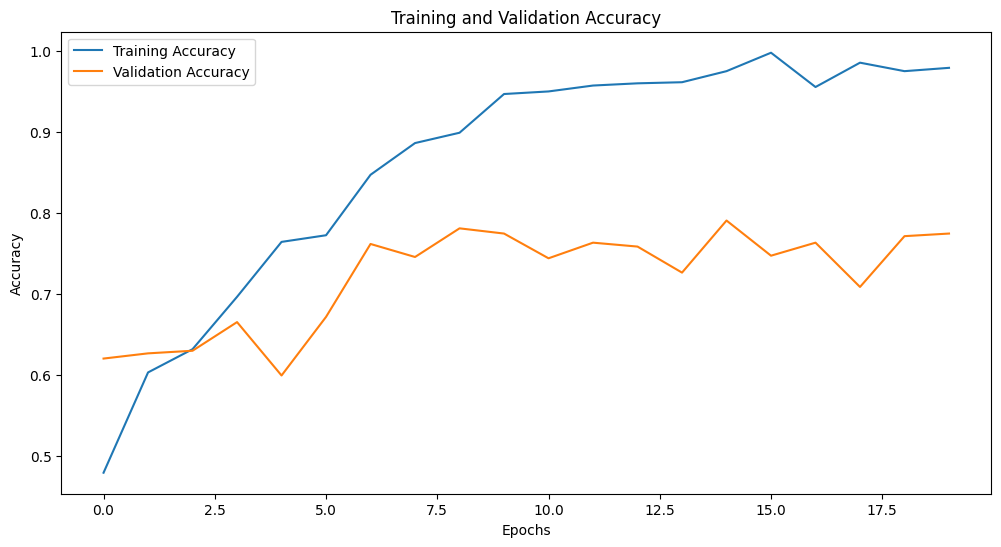

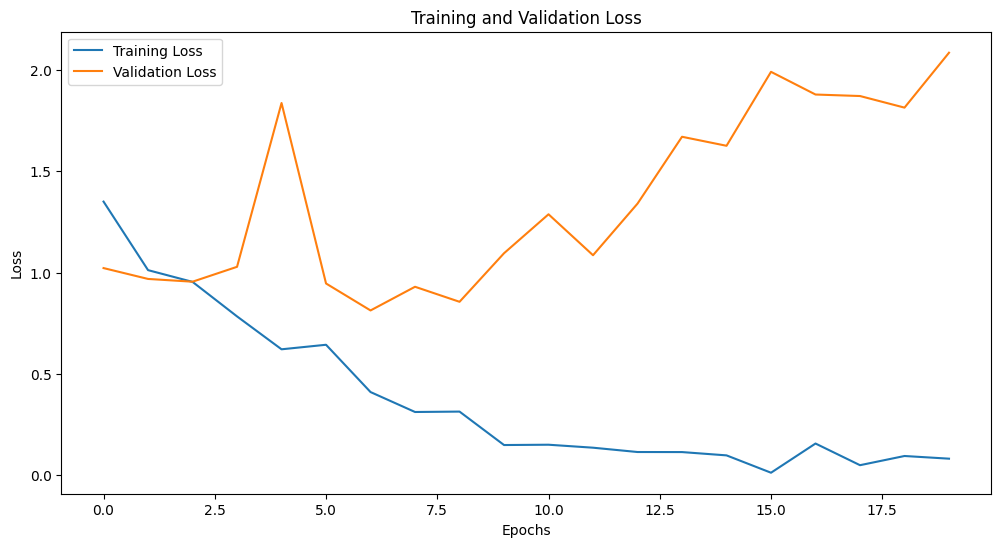

In [3]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

311/311 [==============================] - 15s 48ms/step - loss: 2.0849 - accuracy: 0.7746
Validation accuracy: 77.46%
311/311 [==============================] - 15s 49ms/step
Classification Report:
                       precision    recall  f1-score   support

Bacterial Leaf Blight       0.76      0.83      0.79        88
           Brown Spot       0.67      0.58      0.62        88
              Healthy       0.67      0.72      0.69        88
           Leaf Blast       0.55      0.47      0.51        88
          Leaf Blight       0.96      1.00      0.98        53
           Leaf Scald       0.91      0.94      0.93        88
            Leaf smut       0.97      0.97      0.97        40
    Narrow Brown Spot       0.82      0.89      0.85        88

             accuracy                           0.77       621
            macro avg       0.79      0.80      0.79       621
         weighted avg       0.77      0.77      0.77       621



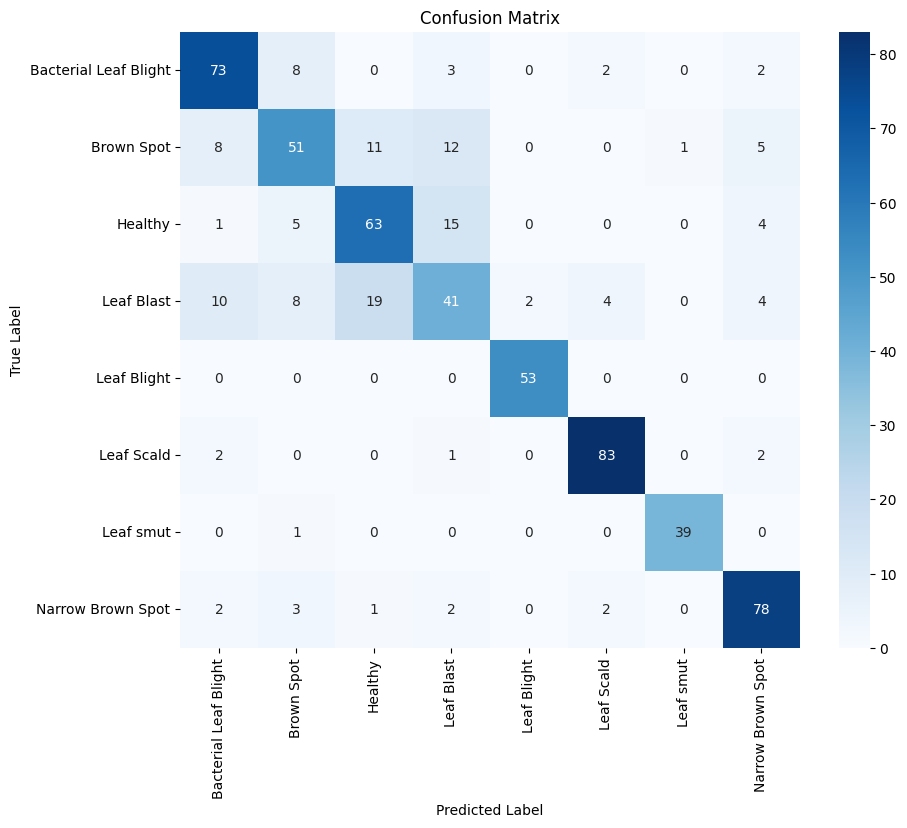

In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation accuracy: {:.2f}%".format(accuracy * 100))

# Prediction
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get class labels
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(validation_generator.classes, y_pred, target_names=class_labels))

# Print and plot confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the trained model
model.save('BPNN_model.h5')

1/1 [==============================] - 0s 61ms/step


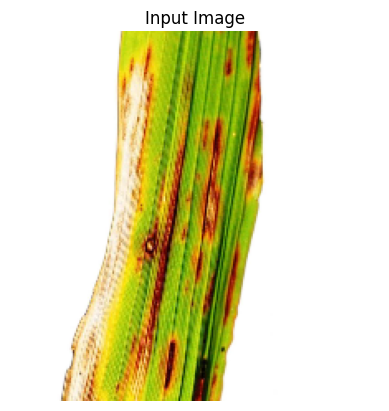

Predicted Class Index: 7
Predicted Class Name: Narrow Brown Spot


In [5]:
# Load the saved model
loaded_model = tf.keras.models.load_model('BPNN_model.h5')

# Load and preprocess the input image
img_path = r"F:\ABDUL\ABDUL 2024\RICE PLANT DISEASE DETECTION YOLO\FINAL SOURCE CODE\RICE PLANT 3 ALGARITHOM\xception\train code\train\Narrow Brown Spot\narrow_brown (3).JPG"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the input image

# Make prediction
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get the class name corresponding to the predicted class index
predicted_class_name = class_labels[predicted_class]

# Display the input image
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()

# Print predicted class index and its corresponding class name
print("Predicted Class Index:", predicted_class)
print("Predicted Class Name:", predicted_class_name)